In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from astropy.io import fits

In [2]:
def rotate(px,py,angle,x0=0,y0=0):
    
    theta = np.deg2rad(angle)
    
    qx = x0 + np.cos(theta) * (px-x0) - np.sin(theta) * (py-y0)
    qy = y0 + np.sin(theta) * (px-x0) + np.cos(theta) * (py-y0)
    
    return qx, qy

In [3]:
def matchlistID(master,cat,matchtol,x1,y1,x2,y2,id_mat):

    matchids_in = np.zeros((len(master),1))

    nF = True
    row = 0

    while nF:

        matchrows = cat[(abs(master[row][x1] - cat[:,x2]) \
            <= matchtol) & (abs(master[row][y1] - cat[:,y2])<= matchtol)]

        if (len(matchrows) == 1):
            matchids_in[row][0] = matchrows[0][id_mat]
            row += 1

        elif (len(matchrows) > 1):
            distDiff = np.zeros((len(matchrows),1))
            for dd in range(len(matchrows)):
                distDiff[dd] = np.sqrt( (master[row][x1] - \
                matchrows[dd][x2])**2 +  (master[row][y1] \
                                    - matchrows[dd][y2])**2)
            small = np.argmin(distDiff)
            matchids_in[row][0] = matchrows[small][id_mat]
            row += 1

        else:
            master = np.delete(master,row,0)
            matchids_in = np.delete(matchids_in,row,0)

        if (row >= len(master)):
            u, udx = np.unique(matchids_in,return_index=True)

            if len(udx)<len(master):

                # print(len(udx),len(master))
                master = master[udx]
                matchids_in = matchids_in[udx]

                print("Pixel Tolerance: {0:d}, Number Stars: {1:d}".format(matchtol,len(master)))
                nF = False

            elif len(udx)==len(master):
                # print(len(udx),len(master))
                print("Pixel Tolerance: {0:d}, Number Stars: {1:d}".format(matchtol,len(master)))
                nF = False

    return master,matchids_in

In [4]:
f814wN = np.genfromtxt('catRawMags20Aug/catDir_RETICULUM-III/RETICULUM-III_DRCfiltTrans_pU.dat',names=True)
f606wN = np.genfromtxt('photUtils20Aug/catDir_RETICULUM-III/jdan28010_drc_F606WphotU.dat',names=True)

In [5]:
f814w = np.genfromtxt('catRawMags20Aug/catDir_RETICULUM-III/RETICULUM-III_DRCfiltTrans_pU.dat')
f606w = np.genfromtxt('photUtils20Aug/catDir_RETICULUM-III/jdan28010_drc_F606WphotU.dat')

In [6]:
col606 = np.array(f606wN.dtype.names)
col814 = np.array(f814wN.dtype.names)

In [7]:
x = np.int(np.where(col606=='xcenter')[0])
y = np.int(np.where(col606=='ycenter')[0])
mag = np.int(np.where(col606=='magr')[0])
idColv = np.int(np.where(col606=='id')[0])

In [8]:
# fitsDir = '../Hannah_Data/origDRCs/'

# hdu1 = fits.open(fitsDir+'jdan29010_drc.fits')
# angf814w = hdu1[1].header['ORIENTAT']
# hdu1.close()

# hdu1 = fits.open(fitsDir+'jdan28010_drc.fits')
# angf606w = hdu1[1].header['ORIENTAT']
# hdu1.close()

In [9]:
# Switch to F606W frame
# Need to find difference between F814W angle and F606W

# angle = float(angf814w) - float(angf606w)

In [13]:
v50x = np.argsort(f606wN['magr'])[:100]
i50x = np.argsort(f814wN['magr'])[:100]

v50 = f606w[v50x]
i50 = f814w[i50x]

v50n = f606wN[v50x]
i50n = f814wN[i50x]

# i50x, i50y = rotate(i50n['x_f606wTrans'],i50n['y_f606wTrans'],angle=angle,x0=2048,y0=2048)

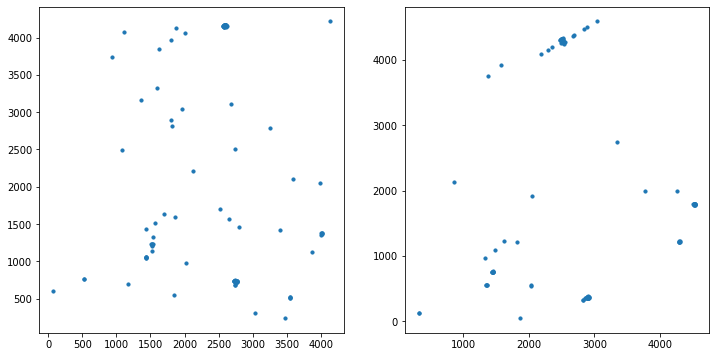

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.scatter(v50n['xcenter'],v50n['ycenter'],s=10)
ax2.scatter(i50n['x_f606wTrans'],i50n['y_f606wTrans'],s=10)

plt.show()

In [15]:
master_in = v50[:,[idColv,x,y,mag]]
idV,xv,yv,magv = 0,1,2,3

i50_arr = np.zeros((len(v50),3))
i50_arr[:,0] = i50n['x_f606wTrans']
i50_arr[:,1] = i50n['y_f606wTrans']
i50_arr[:,2] = i50n['id']

xi, yi, idColi = 0,1,2

cat = i50_arr
matchids = np.zeros((len(master_in),1))

nF_out = True
matchtol = 5

while nF_out:

    master, matchids = matchlistID(master_in,cat,matchtol,xv,yv,xi,yi,idColi)

    if len(master)>=int(6): # because it's a 6D transformation
        nF_out = False
        print('Minimum Number Reached:{0:d}'.format(len(master)))
    else:
        print('Need More Stars')
        master_in = v50[:,[idColv,x,y,mag]]
        matchids = np.zeros((len(master_in),1))
        matchtol += 3
        
master = np.hstack((master,matchids))
idV, xv, yv, magv, idI = 0, 1, 2, 3, 4

newCols = np.zeros((len(master),3))

idxCol = master[:,idI]
idxI = np.asarray(idxCol,int)
regI = f814w[idxI]

newCols[:,0] = regI[:,x]
newCols[:,1] = regI[:,y]
newCols[:,2] = regI[:,mag]

outArr = np.hstack((master,newCols))

Pixel Tolerance: 5, Number Stars: 0
Need More Stars
Pixel Tolerance: 8, Number Stars: 0
Need More Stars
Pixel Tolerance: 11, Number Stars: 0
Need More Stars
Pixel Tolerance: 14, Number Stars: 0
Need More Stars
Pixel Tolerance: 17, Number Stars: 0
Need More Stars
Pixel Tolerance: 20, Number Stars: 0
Need More Stars
Pixel Tolerance: 23, Number Stars: 0
Need More Stars
Pixel Tolerance: 26, Number Stars: 0
Need More Stars
Pixel Tolerance: 29, Number Stars: 0
Need More Stars
Pixel Tolerance: 32, Number Stars: 0
Need More Stars
Pixel Tolerance: 35, Number Stars: 0
Need More Stars
Pixel Tolerance: 38, Number Stars: 1
Need More Stars
Pixel Tolerance: 41, Number Stars: 1
Need More Stars
Pixel Tolerance: 44, Number Stars: 1
Need More Stars
Pixel Tolerance: 47, Number Stars: 1
Need More Stars
Pixel Tolerance: 50, Number Stars: 1
Need More Stars
Pixel Tolerance: 53, Number Stars: 1
Need More Stars
Pixel Tolerance: 56, Number Stars: 1
Need More Stars
Pixel Tolerance: 59, Number Stars: 1
Need More S

In [16]:
i50_arr.shape

(100, 3)

In [17]:
outArr[0]

array([ 776.        , 1440.4289063 , 1051.05805966,   17.9912553 ,
       2196.        , 2618.95812218, 1370.21683111,   21.27181117])

In [18]:
header = 'id_f606w x_f606w y_f606w magr_f606w id_f814w x_f814w y_f814w magr_f814w'
form = '%d %1.5f %1.5f %1.4f %d %1.5f %1.5f %1.4f'

In [19]:
idV, xv, yv, magv, idI, xi, yi, magi = 0, 1, 2, 3, 4, 5, 6, 7

In [31]:
# newx, newy = rotate(outArr[:,xi],outArr[:,yi],angle=angle,x0=2048,\
#                     y0=2048)

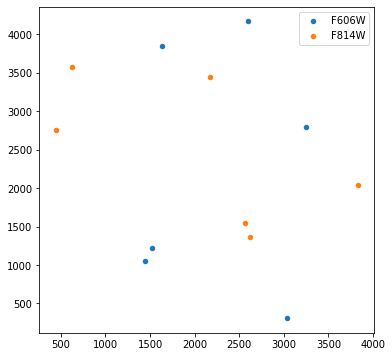

In [20]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(outArr[:,xv],outArr[:,yv],label='F606W',s= 20)
ax.scatter(outArr[:,xi],outArr[:,yi],label='F814W',s=20)

ax.legend()
# ax.set_title(targname)

# plt.savefig(outName+'.png',dpi=600,bbox_inches='tight')
# plt.savefig(outName+'.png',dpi=600,bbox_inches='tight')

plt.show()

In [21]:
outName = 'catRawMags20Aug/catDir_RETICULUM-III/drcFiltRef_RETICULUM-III_2'
np.savetxt(outName+'.dat',outArr,header=header,fmt=form)

In [22]:
file = np.genfromtxt('catRawMags20Aug/catDir_RETICULUM-III/RETICULUM-III_filtMatchDRC_pU.dat',names=True)

In [23]:
file.dtype.names

('id_f606w',
 'xcenter_f606w',
 'ycenter_f606w',
 'aperture_sum_f606w',
 'annulus_median_f606w',
 'aper_bkg_f606w',
 'final_phot_f606w',
 'magr_f606w',
 'id_f814w',
 'xcenter_f814w',
 'ycenter_f814w',
 'aperture_sum_f814w',
 'annulus_median_f814w',
 'aper_bkg_f814w',
 'final_phot_f814w',
 'magr_f814w',
 'x_f606wTrans',
 'y_f606wTrans')

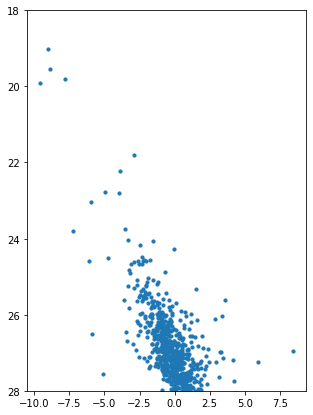

In [24]:
fig,ax = plt.subplots(figsize=(5,7))

ax.scatter(file['magr_f606w']-file['magr_f814w'],file['magr_f606w'],s=10)


ax.set_ylim(28,18)

plt.show()